# Learning graph from data

In [1]:
## import module
from CGmodelselection.graph import get_graph_from_data

**Specify the data to be used**

Specify filename an optionally columns that shall not be loaded in the variable *drop*.

In [2]:
## chose one dataset here (or enter your own), list columns not to be loaded in variable <drop>
#filename = "unittest_data/australian-crabs.csv"
#drop =['index']

filename = "datasets/iris.csv"
drop = []

#filename = "datasets/titanic.csv"
#drop = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']

Disable autoscrolling for outputs.

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

**Learn the (weighted) graph**

Filename: datasets/iris.csv
Using a dataset with 150 samples, 1 discrete and 4 continuous variables.
Discrete Variables: ['species']
Continuous Variables: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Solving problem.. Done.


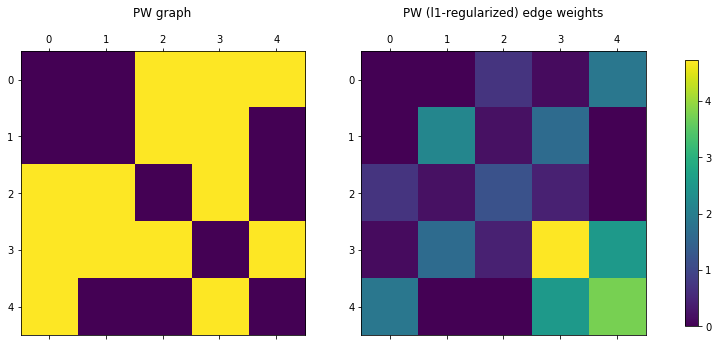

Legende:
0 - species
1 - sepal_length
2 - sepal_width
3 - petal_length
4 - petal_width


In [4]:
## parameters for graph estimation
standardize = True # standardize data before learning (recommended)
kS = 2 # trade-off parameter for l1-regularization term
model = 'PW' # choose from 'PW' (pairwise model) and 'CLZ' (CLZ model with triple interactions)
graphthreshold = 1e-1 # threshold for graph

## get matrix of group-norms (grpnormmat), graph (graph), and legend for row-/column names (dictionary dlegend)
grpnormmat, graph, dlegend = get_graph_from_data(filename, drop = drop, model = model,
                                                 graphthreshold = graphthreshold, standardize = standardize, kS = kS)

**We might also want to rank the edges in terms of their respective edge weights (i.e., their corresponding group-norms).**

In [5]:
from CGmodelselection.graph import order_edges_by_weight

all_ordered_edges = order_edges_by_weight(grpnormmat, disp = True, graphthreshold = graphthreshold)


Edge	Edgeweight
4-3	2.53
4-0	1.87
3-1	1.66
2-0	0.71
3-2	0.43
2-1	0.21
3-0	0.14


In [6]:
# print all edges
all_ordered_edges

[(2.5316271269980142, (4, 3)),
 (1.8665811666620116, (4, 0)),
 (1.6584870326637182, (3, 1)),
 (0.71493664893482634, (2, 0)),
 (0.42919539066998397, (3, 2)),
 (0.20551741556151062, (2, 1)),
 (0.14069238384717406, (3, 0)),
 (9.3433223095025321e-05, (4, 1)),
 (8.3334998038462108e-05, (1, 0)),
 (4.0943646435990299e-05, (4, 2))]